#### https://www.kaggle.com/competitions/titanic/overview
Overview of the project


# Import Statements

In [91]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Formatting to 2 digits

In [92]:
pd.options.display.float_format = '{:,.2f}'.format

In [93]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### Column names and meaning

---------------------------

**Characteristics:**  

    :Number of Instances: 891 

    :Number of Attributes: 12 numeric/categorical predictive. The Survived value (attribute 2) is the target.

    :Attribute Information (in order):
        1. PassengerId     Id of Passenger
        2. Survived     Survival  0 = No, 1 = Yes
        3. Pclass    Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd pclass: A proxy for socio-economic status (SES)
                1st = Upper
                2nd = Middle
                3rd = Lower
        4. Name     
        5. Sex      Sex	
        6. Age       Age in years	Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
        7. SibSp      # of siblings / spouses aboard the Titanic	
            The dataset defines family relations in this way...
            Sibling = brother, sister, stepbrother, stepsister
            Spouse = husband, wife (mistresses and fiancés were ignored)
        8. Parch      # of parents / children aboard the Titanic	
                    The dataset defines family relations in this way...
                    Parent = mother, father
                    Child = daughter, son, stepdaughter, stepson
                    Some children travelled only with a nanny, therefore parch=0 for them.
        9. Ticket      Ticket number	
        10. Fare      Passenger fare
        11. Cabin   Cabin number
        12. Embarked   Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton
    

# Preliminary Data exploration

In [94]:
df_train.shape
#891 rows 12 columns
#df_titanic.columns
#df_train.drop("PassengerId",axis=1,inplace=True)
#df_test.drop("PassengerId",axis=1,inplace=True)
df_train
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S


In [95]:
#df_train.head()
#Cabin has 687 NaN values, embarked has 2 and age has 177
df_train.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Let's figure out how to deal with the NaN values and think of questions i want to answer
Get to know the data and how it looks before i try to use a Linear regression to try to predict
Then i will try other models that i haven't used before like Logistic Regression and the RandomForest which i saw


## General steps to follow

1.Acquire and explore the data: Download the train and test datasets from Kaggle and perform exploratory data analysis (EDA) to understand the distribution of the variables and identify any patterns or missing data.

2.Clean and preprocess the data: Handle missing values and outliers, and convert categorical variables into numerical variables so that they can be used in the model.

3.Feature Engineering: Create new features by combining existing variables or by extracting useful information from the variables.

4.Select and train a model: Select a suitable machine learning algorithm, such as Random Forest, SVM, Logistic Regression, etc. and train it on the preprocessed data.

5.Evaluate the model: Use techniques such as cross-validation to evaluate the performance of the model.

6.Make predictions on the test dataset and submit the result to Kaggle.

# Going in depth on the first steps

Acquiring and exploring the data: This step involves downloading the train and test datasets from Kaggle and using tools such as pandas and matplotlib to perform exploratory data analysis (EDA) to understand the distribution of the variables and identify any patterns or missing data.
For example, you can use the pandas library to load the train and test datasets into dataframes and use the .head() method to view the first few rows of the data. You can use the .info() method to get a summary of the dataframe, including the number of non-null values in each column, and the .describe() method to get a summary of the numerical variables.

You can also use the matplotlib library to create visualizations such as histograms, bar plots, and scatter plots to help you understand the distribution of the variables and identify patterns or outliers in the data.

Cleaning and preprocessing the data: This step involves handling missing values and outliers, and converting categorical variables into numerical variables so that they can be used in the model.
For example, if you find that a column has missing values, you may choose to fill in the missing values with the mean or median of the column. If you find outliers in the data, you may choose to remove them or replace them with a more reasonable value.

To convert categorical variables into numerical variables, you can use techniques such as one-hot encoding, which creates a new binary column for each unique category in a categorical variable.

Feature Engineering: This step involves creating new features by combining existing variables or by extracting useful information from the variables.
For example, you can create a new feature by combining the "Pclass" and "Fare" columns to indicate the fare paid by a passenger in each class. You can also create new features by extracting useful information from the "Name" column, such as the title of a passenger.

You can also group some data based on their similarity, for example the age, you can group them by age range (child, young, adult, senior) which can give more information to the model

It's important to note that feature engineering is an iterative process, and you may need to go back and repeat step 2 and 3 multiple times to improve your model's performance.

In [97]:
#Info and describe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [99]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [100]:
#Creating a new binary column for the gender
df_train["Sex_binary"] = df_train["Sex"].map({"male": 0, "female": 1})
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C,0


In [101]:
df_test["Sex_binary"] = df_train["Sex"].map({"male": 0, "female": 1})
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S,1


In [102]:
#Creating a numerical column for the embarked column
df_train["Embarked"].fillna(df_train["Embarked"].mode()[0], inplace=True)

df_train["Embarked_num"] = df_train["Embarked"].map({"S": 0, "C": 1, "Q": 2})
df_train['Embarked_num']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked_num, Length: 891, dtype: int64

In [103]:
#Creating a numerical column for the embarked column
df_test["Embarked"].fillna(df_test["Embarked"].mode()[0], inplace=True)

df_test["Embarked_num"] = df_test["Embarked"].map({"S": 0, "C": 1, "Q": 2})
df_test['Embarked_num']

0      2
1      0
2      2
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Embarked_num, Length: 418, dtype: int64

## Visualizing the data

### How many passengers survived?


In [104]:
survival = df_train.groupby('Survived',as_index=False).agg({"Name":pd.Series.count})
survival

,Survived,Name
0,0,549
1,1,342


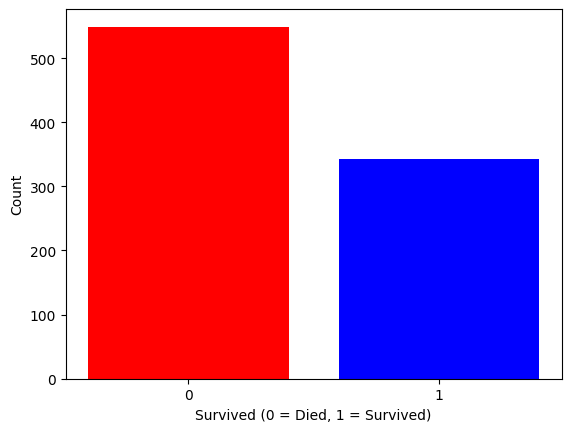

In [105]:
plt.bar(survival['Survived'], survival["Name"], color=["red", "blue"])

# Label the x-axis
plt.xlabel("Survived (0 = Died, 1 = Survived)")
plt.xticks([0, 1])

# Label the y-axis
plt.ylabel("Count")

# Show the plot
plt.show()

## Class Split
### What did the split look for the ticket classes?

In [106]:
ticketsplit = df_train.groupby('Pclass',as_index=False).count()
ticketsplit

,Pclass,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Embarked_num
0,1,216,216,216,216,186,216,216,216,216,176,216,216,216
1,2,184,184,184,184,173,184,184,184,184,16,184,184,184
2,3,491,491,491,491,355,491,491,491,491,12,491,491,491


In [107]:
fig = px.pie(data_frame=ticketsplit, 
             values='Survived', 
             names='Pclass',
             title='Passenger split by ticket class')
fig.show()

In [108]:
classurvival = df_train.groupby(['Pclass','Survived'],as_index=False).count()

In [109]:
# Create the stacked bar chart
fig = px.bar(classurvival, 
             x="Pclass", 
             y="Name", 
             color="Survived", 
             barmode="stack",
             title="Survival split per Ticket class")

# Update the axis labels
fig.update_layout(xaxis_title="Ticket Class", yaxis_title="Count",coloraxis_showscale=False)
fig.update_layout(xaxis=dict(tickmode="array", tickvals=[0, 1, 2]))


# Show the plot
fig.show()

#### The 2 higher classes have a much higher chance of survival 
#### For first class it has 136 survived vs 80 deaths
#### 2nd has 87 vs 97
#### 3rd has 119 survivals vs 372 deaths, so most deaths came from third class

## Let's check the gender split and see how big of a role it played

In [110]:
gendersplit = df_train.groupby('Sex').count()
gendersplit

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Embarked_num
Sex,,,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,314,314,314
male,577,577,577,577,453,577,577,577,577,107,577,577,577


In [111]:
bar= px.bar(gendersplit, 
             x=gendersplit.index, 
             y=gendersplit['Survived'],  
             title='Gender split on the titanic',
             color=gendersplit.index,
             color_continuous_scale='Electric'
             )
bar.update_layout(coloraxis_showscale=False, xaxis_title = "Gender", yaxis_title='Amount')
bar.update_layout(yaxis=dict(tickfont=dict(size=10)))
bar.show()

In [112]:
gendersurvival = df_train.groupby(['Sex_binary','Survived'],as_index=False).count()
gendersurvival

,Sex_binary,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_num
0,0,0,468,468,468,468,360,468,468,468,468,62,468,468
1,0,1,109,109,109,109,93,109,109,109,109,45,109,109
2,1,0,81,81,81,81,64,81,81,81,81,6,81,81
3,1,1,233,233,233,233,197,233,233,233,233,91,233,233


In [113]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)
men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)
print(rate_men+rate_women)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924
0.9309463621410987


In [114]:
# Create the stacked bar chart
fig = px.bar(gendersurvival, 
             x="Sex_binary", 
             y="Name", 
             color="Survived", 
             barmode="stack",
             title="Survival split per Gender",
             color_continuous_scale='portland')

# Update the axis labels
fig.update_layout(xaxis_title="Gender", yaxis_title="Survivals",coloraxis_showscale=False)

fig.update_layout(xaxis=dict(tickmode="array", tickvals=[0, 1], ticktext=["Male", "Female"]))

# Show the plot
fig.show()

## Age groups-How much of a role did age play in survivals?
### Let's also create a new column with age groups

<Figure size 2800x1600 with 0 Axes>

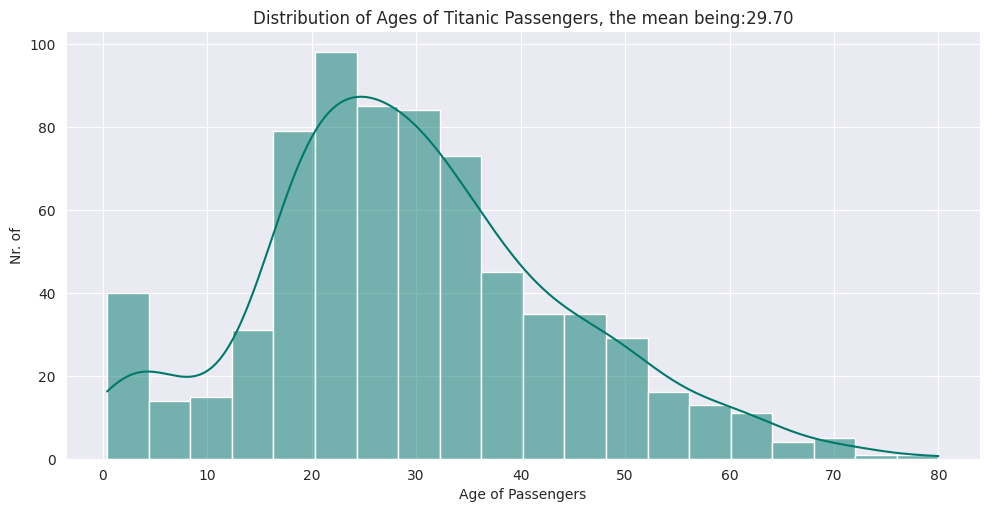

In [115]:
#Distribution of ages
#For NaN on Age I group by SibSp and Path and took the mean of the category 
# if available (this is just a try, but seems better than avg on all)
plt.figure(figsize=(14,8),dpi=200)
with sns.axes_style('darkgrid'):
    sns.displot(data=df_train,x='Age',kde=True,aspect=2,color='#00796b')
plt.title(f'Distribution of Ages of Titanic Passengers, the mean being:{df_train.Age.mean():.2f}')
plt.xlabel('Age of Passengers')
plt.ylabel('Nr. of')

plt.show()

<Figure size 2800x1600 with 0 Axes>

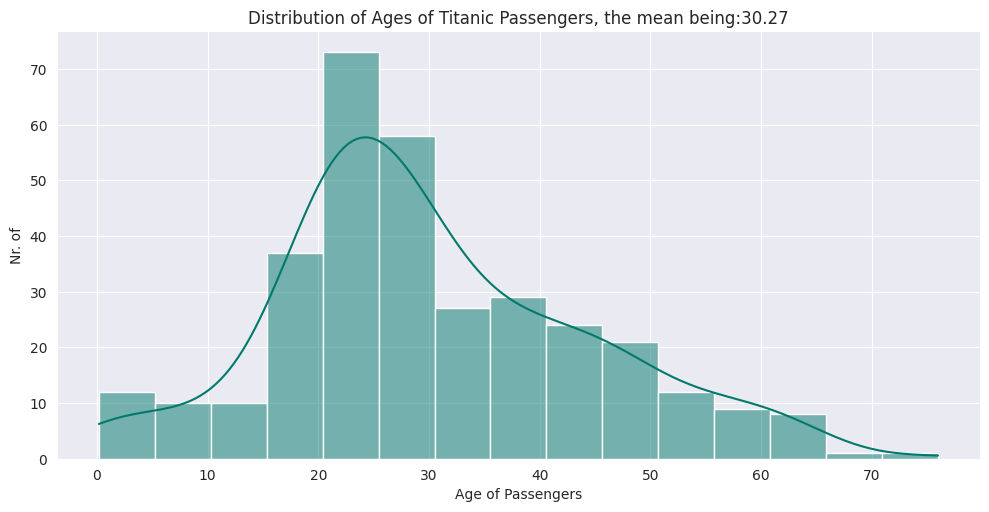

In [116]:
plt.figure(figsize=(14,8),dpi=200)
with sns.axes_style('darkgrid'):
    sns.displot(data=df_test,x='Age',kde=True,aspect=2,color='#00796b')
plt.title(f'Distribution of Ages of Titanic Passengers, the mean being:{df_test.Age.mean():.2f}')
plt.xlabel('Age of Passengers')
plt.ylabel('Nr. of')

plt.show()

In [117]:
#Dealing with missing age values
# Separate the age and the other features
age = df_train["Age"].values.reshape(-1, 1)
features = ["Pclass", "SibSp", "Parch"]
X = df_train[features].fillna(df_train[features].mean()).values

# Train the linear regression model on the non-null age values
mask = np.isnan(age).ravel()
model = LinearRegression()
model.fit(X[~mask], age[~mask])

# Predict the missing values of the age column
age[mask] = model.predict(X[mask])

# Fill the missing values in the original dataframe
df_train["Age"] = age.reshape(-1)

In [118]:
#Running the same regression on the test dataset
# Separate the age and the other features
age = df_test["Age"].values.reshape(-1, 1)
features = ["Pclass", "SibSp", "Parch"]
X = df_test[features].fillna(df_test[features].mean()).values

# Train the linear regression model on the non-null age values
mask = np.isnan(age).ravel()
model = LinearRegression()
model.fit(X[~mask], age[~mask])

# Predict the missing values of the age column
age[mask] = model.predict(X[mask])

# Fill the missing values in the original dataframe
df_test["Age"] = age.reshape(-1)

In [119]:
#Using KNN, will try for a second submit to see if it improves

#from fancyimpute import KNNImputer
#
## Replace missing values with NaN
#df_train['Age'].replace(np.nan, np.nan, inplace=True)
#
## Impute missing values using KNN
#imputer = KNNImputer(n_neighbors=5)
#df_train['Age'] = imputer.fit_transform(df_train[['Age']])

In [120]:
#Create 4 age groups
median_age = df_train[df_train["Age"] >= 0]["Age"].median()

# Replace negative ages with the median age
df_train.loc[df_train["Age"] < 0, "Age"] = median_age

median_agetest = df_test[df_test["Age"] >= 0]["Age"].median()

# Replace negative ages with the median age
df_test.loc[df_test["Age"] < 0, "Age"] = median_agetest


In [121]:
df_train['Age_group'] = pd.cut(df_train['Age'], bins=[0, 16, 32 , 48, 64, 80], labels=[0, 1, 2, 3, 4], include_lowest=True)
df_test['Age_group'] = pd.cut(df_test['Age'], bins=[0, 16, 32, 48, 64, 80], labels=[0, 1, 2, 3, 4], include_lowest=True)

df_test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Embarked_num,Age_group
333,1225,3,"Nakid, Mrs. Said (Waika Mary"" Mowad)""",female,19.00,1,1,2653,15.74,NaN,C,0,1,1
128,1020,2,"Bowenur, Mr. Solomon",male,42.00,0,0,211535,13.00,NaN,S,1,0,2
18,910,3,"Ilmakangas, Miss. Ida Livija",female,27.00,1,0,STON/O2. 3101270,7.92,NaN,S,1,0,1
400,1292,1,"Bonnell, Miss. Caroline",female,30.00,0,0,36928,164.87,C7,S,0,0,1
88,980,3,"O'Donoghue, Ms. Bridget",female,24.08,0,0,364856,7.75,NaN,Q,1,2,1
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,40.58,0,0,112051,0.00,NaN,S,0,0,2
165,1057,3,"Kink-Heilmann, Mrs. Anton (Luise Heilmann)",female,26.00,1,1,315153,22.02,NaN,S,0,0,1
254,1146,3,"Wenzel, Mr. Linhart",male,32.50,0,0,345775,9.50,NaN,S,1,0,2
36,928,3,"Roth, Miss. Sarah A",female,24.08,0,0,342712,8.05,NaN,S,0,0,1
357,1249,3,"Lockyer, Mr. Edward",male,24.08,0,0,1222,7.88,NaN,S,1,0,1


In [122]:
#See which age group survived the most
age_group_survival = df_train.groupby(['Age_group','Survived'],as_index=False).count()

fig = px.bar(age_group_survival, 
             x="Age_group", 
             y="Name", 
             color="Survived", 
             barmode="group",
             title="Survival split per Age Group")

# Update the axis labels
fig.update_layout(xaxis_title="Age Group", yaxis_title="Survivals",coloraxis_showscale = False)
fig.update_xaxes(ticktext=['0-20', '21-40', '41-60', '61-80'], tickvals=[0, 1, 2, 3])

# Show the plot
fig.show()

#As expected,the youngest group has the highest survival rate


### Siblings, spouses, parents, chlidren
##### Does having something to lose mean you're less likely to survive?
##### Let's see how much of a role it played on survival

In [123]:
df_train.groupby(["Survived",'Parch']).count()

PassengerId  Pclass  Name  Sex  Age  SibSp  Ticket  Fare  \
Survived Parch                                                             
0        0              445     445   445  445  445    445     445   445   
         1               53      53    53   53   53     53      53    53   
         2               40      40    40   40   40     40      40    40   
         3                2       2     2    2    2      2       2     2   
         4                4       4     4    4    4      4       4     4   
         5                4       4     4    4    4      4       4     4   
         6                1       1     1    1    1      1       1     1   
1        0              233     233   233  233  233    233     233   233   
         1               65      65    65   65   65     65      65    65   
         2               40      40    40   40   40     40      40    40   
         3                3       3     3    3    3      3       3     3   
         5                1       1     1    1    1      1       1     1   

                Cabin  Embarked  Sex_binary  Embarked_num  Age_group  
Survived Parch                                                        
0        0         50       445         445           445        445  
         1         11        53          53            53         53  
         2          6        40          40            40         40  
         3          0         2           2             2          2  
         4          1         4           4             4          4  
         5          0         4           4             4          4  
         6          0         1           1             1          1  
1        0         91       233         233           233        233  
         1         28        65          65            65         65  
         2         17        40          40            40         40  
         3          0         3           3             3          3  
         5          0         1           1             1          1

In [124]:
df_train.groupby(["Survived",'SibSp']).count()

PassengerId  Pclass  Name  Sex  Age  Parch  Ticket  Fare  \
Survived SibSp                                                             
0        0              398     398   398  398  398    398     398   398   
         1               97      97    97   97   97     97      97    97   
         2               15      15    15   15   15     15      15    15   
         3               12      12    12   12   12     12      12    12   
         4               15      15    15   15   15     15      15    15   
         5                5       5     5    5    5      5       5     5   
         8                7       7     7    7    7      7       7     7   
1        0              210     210   210  210  210    210     210   210   
         1              112     112   112  112  112    112     112   112   
         2               13      13    13   13   13     13      13    13   
         3                4       4     4    4    4      4       4     4   
         4                3       3     3    3    3      3       3     3   

                Cabin  Embarked  Sex_binary  Embarked_num  Age_group  
Survived SibSp                                                        
0        0         49       398         398           398        398  
         1         17        97          97            97         97  
         2          1        15          15            15         15  
         3          1        12          12            12         12  
         4          0        15          15            15         15  
         5          0         5           5             5          5  
         8          0         7           7             7          7  
1        0         77       210         210           210        210  
         1         52       112         112           112        112  
         2          5        13          13            13         13  
         3          2         4           4             4          4  
         4          0         3           3             3          3

In [125]:
#creating a family size column
df_train['Family_Size'] = df_train['SibSp'] + df_train['Parch']
df_test['Family_Size'] = df_test['SibSp'] + df_train['Parch']
df_train.groupby(["Survived","Family_Size"],as_index=False).count()

,Survived,Family_Size,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Embarked_num,Age_group
0,0,0,374,374,374,374,374,374,374,374,374,39,374,374,374,374
1,0,1,72,72,72,72,72,72,72,72,72,17,72,72,72,72
2,0,2,43,43,43,43,43,43,43,43,43,8,43,43,43,43
3,0,3,8,8,8,8,8,8,8,8,8,2,8,8,8,8
4,0,4,12,12,12,12,12,12,12,12,12,0,12,12,12,12
5,0,5,19,19,19,19,19,19,19,19,19,2,19,19,19,19
6,0,6,8,8,8,8,8,8,8,8,8,0,8,8,8,8
7,0,7,6,6,6,6,6,6,6,6,6,0,6,6,6,6
8,0,10,7,7,7,7,7,7,7,7,7,0,7,7,7,7
9,1,0,163,163,163,163,163,163,163,163,163,55,163,163,163,163


## Did the Embark location matter?

In [126]:
#One-hot on Embarked
#This is done by the pd.get_dummies when the model is run
#Let's group and see how the numbers look

In [127]:
df_train.groupby(['Survived','Embarked'],as_index=False).count()

#Most people departed from S and 50% of them survived, C is the only one where more people survived

,Survived,Embarked,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_binary,Embarked_num,Age_group,Family_Size
0,0,C,75,75,75,75,75,75,75,75,75,17,75,75,75,75
1,0,Q,47,47,47,47,47,47,47,47,47,2,47,47,47,47
2,0,S,427,427,427,427,427,427,427,427,427,49,427,427,427,427
3,1,C,93,93,93,93,93,93,93,93,93,52,93,93,93,93
4,1,Q,30,30,30,30,30,30,30,30,30,2,30,30,30,30
5,1,S,219,219,219,219,219,219,219,219,219,82,219,219,219,219


### Extracting title from names, did a Rev. or a Mrs. have a higher chance of survival compared to a Mr.?

In [128]:
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

# Create a new column 'Title' with the extracted title
df_train['Title'] = df_train['Name'].apply(extract_title)
df_train['Title']
df_test['Title'] = df_test['Name'].apply(extract_title)

In [129]:
df_train.groupby(['Survived', 'Title'],as_index=False).count()

,Survived,Title,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Embarked_num,Age_group,Family_Size
0,0,Capt,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,Col,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
2,0,Don,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
3,0,Dr,4,4,4,4,4,4,4,4,4,1,4,4,4,4,4
4,0,Jonkheer,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
5,0,Major,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,0,Master,17,17,17,17,17,17,17,17,17,0,17,17,17,17,17
7,0,Miss,55,55,55,55,55,55,55,55,55,3,55,55,55,55,55
8,0,Mr,436,436,436,436,436,436,436,436,436,59,436,436,436,436,436
9,0,Mrs,26,26,26,26,26,26,26,26,26,3,26,26,26,26,26


## Playing around with ticket types


In [130]:
df_train['Ticket_type'] = df_train['Ticket'].apply(lambda x: x[0:3])
df_train['Ticket_type'] = df_train['Ticket_type'].astype('category')
df_train['Ticket_type'] = df_train['Ticket_type'].cat.codes

df_test['Ticket_type'] = df_test['Ticket'].apply(lambda x: x[0:3])
df_test['Ticket_type'] = df_test['Ticket_type'].astype('category')
df_test['Ticket_type'] = df_test['Ticket_type'].cat.codes

In [131]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Embarked_num,Age_group,Family_Size,Title,Ticket_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0,0,1,1,Mr,124
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1,1,2,1,Mrs,137
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1,0,1,0,Miss,148
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1,0,2,1,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0,0,2,0,Mr,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S,0,0,1,0,Rev,23
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S,1,0,1,0,Miss,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,20.92,1,2,W./C. 6607,23.45,NaN,S,1,0,1,3,Miss,150
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C,0,1,1,0,Mr,1


## Machine learning time
### Let's start with a simple logistic regression then move onto other models

In [132]:
#Possible algos
#Logistic Regression
#k-Nearest Neighbors
#Decision Trees
#Random Forest
#Support Vector Machines
#Neural Network
#You can submit all positive guesses ('Survived') and get a score around 62% accuracy, 
# so that should be the first score you try to beat. See if you can use gender and age to improve
# on that before moving on to building ML models like KNN and Decision Tree. You should be able to get into
# the 70-75% accuracy range using these methods, then improve on those using a little bit of feature engineering.

In [143]:
#cleaning titles
#df_train.groupby('Title',as_index=False).count()
# Replace all occurences of 'Major' with 'Mr'
df_train['Title'] = df_train['Title'].replace({'Major': 'Mr'})
df_test['Title'] = df_test['Title'].replace({'Major': 'Mr'})

# Replace all occurences of 'Jonkheer' with 'Mr'
df_train['Title'] = df_train['Title'].replace({'Jonkheer': 'Mr'})
df_test['Title'] = df_test['Title'].replace({'Jonkheer': 'Mr'})

# Replace all occurences of 'Lady' with 'Ms'
df_train['Title'] = df_train['Title'].replace({'Lady': 'Ms'})
df_test['Title'] = df_test['Title'].replace({'Lady': 'Ms'})
#Title_Mlle
#- Title_Mme
#- Title_Sir
df_train['Title'] = df_train['Title'].replace({'Mlle': 'Miss'})
df_test['Title'] = df_test['Title'].replace({'Mlle': 'Miss'})

df_train['Title'] = df_train['Title'].replace({'Mme': 'Ms'})
df_test['Title'] = df_test['Title'].replace({'Mme': 'Ms'})

df_train['Title'] = df_train['Title'].replace({'Sir': 'Mr'})
df_test['Title'] = df_test['Title'].replace({'Sir': 'Mr'})
#Feature names seen at fit time, yet now missing:
#- Title_Capt
#- Title_Don
#- Title_the Countess
df_train['Title'] = df_train['Title'].replace({'Capt': 'Mr'})
df_test['Title'] = df_test['Title'].replace({'Capt': 'Mr'})

df_train['Title'] = df_train['Title'].replace({'Don': 'Mr'})
df_test['Title'] = df_test['Title'].replace({'Don': 'Mr'})

df_train['Title'] = df_train['Title'].replace({'the Countess': 'Mrs'})
df_test['Title'] = df_test['Title'].replace({'the Countess': 'Mrs'})

df_test['Title'] = df_test['Title'].replace({'Dona': 'Mrs'})
#df_train.groupby('Title',as_index=False).count()
#df_test.groupby('Title',as_index=False).count()

df_train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Embarked_num,Age_group,Family_Size,Title,Ticket_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0,0,1,1,Mr,124
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1,1,2,1,Mrs,137
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1,0,1,0,Miss,148
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1,0,2,1,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0,0,2,0,Mr,97


In [142]:
from sklearn.ensemble import RandomForestClassifier
#Example submission
y = df_train["Survived"]
#Adding the binary sex and embarked num lowerd it too much
#Adding embarked improved it a little bit compared to the tutorial but still worse than before
features = ["Pclass","SibSp","Parch","Sex","Age_group",'Age', 'Title', 'Family_Size']

X = pd.get_dummies(df_train[features], columns=['Sex', 'Embarked', 'Title'])
X_test = pd.get_dummies(df_test[features], columns=['Sex', 'Embarked', 'Title'])

model = RandomForestClassifier(
    random_state=1,
    n_estimators=25,
    min_samples_split=20,
    oob_score=True)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Let's try other algos and extract the title from the name
#Also let's see if maybe a family size column will help
#Features i want to use: Pclass,Sex,Age_group,SibSp,Parch,Ticket_type,Embarked,Family_Size
# select the relevant features
features = ['Pclass', 'Sex', 'Age_group', 'SibSp', 'Parch', 'Ticket_type', 'Embarked', 'Family_Size']
X = df_train[features]

# convert the categorical variables into dummy/indicator variables using one-hot encoding
X = pd.get_dummies(X, columns=['Pclass', 'Sex', 'Age_group', 'Ticket_type', 'Embarked'])

# target variable
y = df_train['Survived']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict the survival outcome for the test set
y_pred = logreg.predict(X_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#adding the title resulted in lower accuracy


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age
- Age_group
- Cabin
- Embarked
- Embarked_num
- ...
Feature names seen at fit time, yet now missing:
- Age_group_0
- Age_group_1
- Age_group_2
- Age_group_3
- Age_group_4
- ...


In [ ]:
from sklearn.linear_model import LogisticRegression
# One-Hot Encoding on the categorical features
X = pd.get_dummies(df_train[['Pclass', 'Sex', 'Age_group', 'SibSp', 'Parch',"Title", 'Embarked','Family_Size']], columns=['Sex', "Title",'Embarked'])
y = df_train['Survived']

# Train Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X, y)

# One-Hot Encoding on the test data
X_test = pd.get_dummies(df_test[['Pclass', 'Sex', 'Age_group', 'SibSp', 'Parch', 'Embarked',"Title", 'Family_Size']], columns=['Sex',"Title", 'Embarked'])

# Predict on the test data
y_pred = logreg.predict(X_test)
#df_test['Survived'] = y_pred
#first regression without get dumies
#this gave me a 0.5598 score,lets change some params
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)
#using get dummies without title and ticket type
#this gave me a score of 0.75598
#lets add the title now and see what we get

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Title_Dona
Feature names seen at fit time, yet now missing:
- Title_Capt
- Title_Don
- Title_Mlle
- Title_Mme
- Title_Sir
- ...


In [ ]:
df_train['Family_Size']
df_test['Fami']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family_Size, Length: 891, dtype: int64